# backstep流の数値計算

In [1]:
using CFD2d
using Plots

In [2]:
param = CFD2d.Parameter(100, 20, 5.0, 1.0, 1000.0, 10.0, 0.01)
field = CFD2d.Field(param)
condition = CFD2d.Backstep()

--------------------------------------------------
                     流体定数
LIQUID: 0
PFIX_BC: 1
VFIX_BC: 2
WALL_BC: 3
ONWALL_BC: 4
ISOLATED_BC: 9
--------------------------------------------------
                    流れ場定数
n: (100, 20)
L: (5.0, 1.0)
ρ: 1000.0
ν: 0.01
Δt: 0.01
Δx: 0.050505050505050504
Δy: 0.05263157894736842
--------------------------------------------------


CFD2d.Backstep()

In [3]:
step = 100

100

In [4]:
CFD2d.initialize(param, field, condition)
for st in 1:step
    CFD2d.smac(param, field)
    println("step: $(st)")
end

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100


## x方向速度

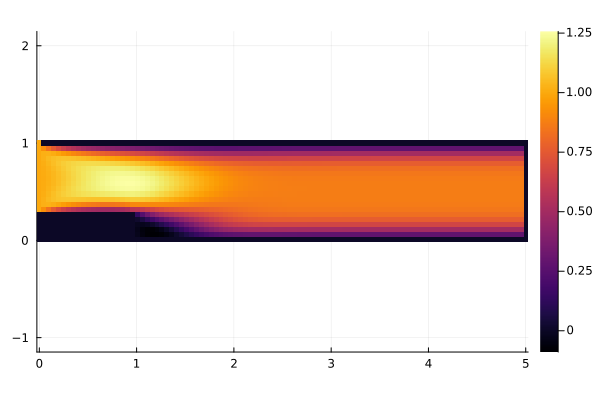

In [5]:
heatmap(param.x, param.y, field.u', aspect_ratio=:equal)

## y方向速度

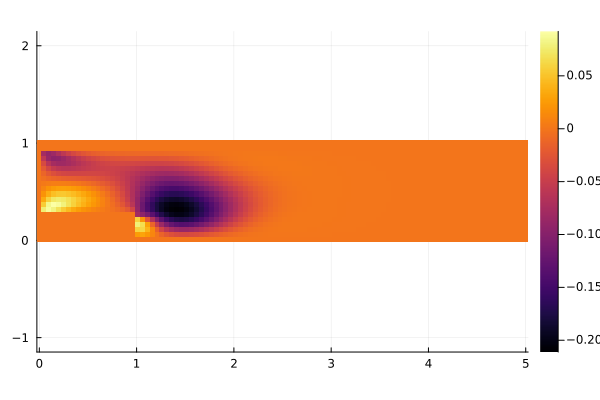

In [6]:
heatmap(param.x, param.y, field.v', aspect_ratio=:equal)

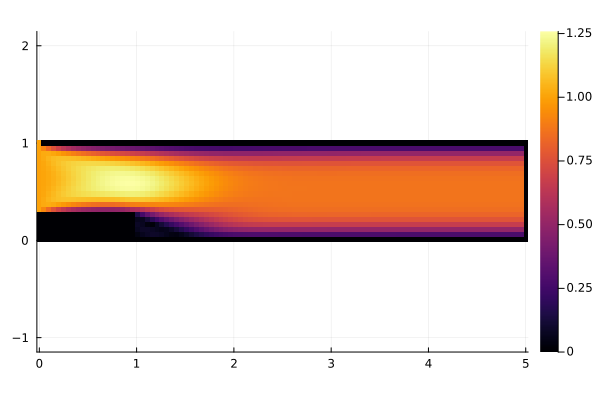

In [7]:
vel = sqrt.(field.u.^2 + field.v.^2)
heatmap(param.x, param.y, vel', aspect_ratio=:equal)

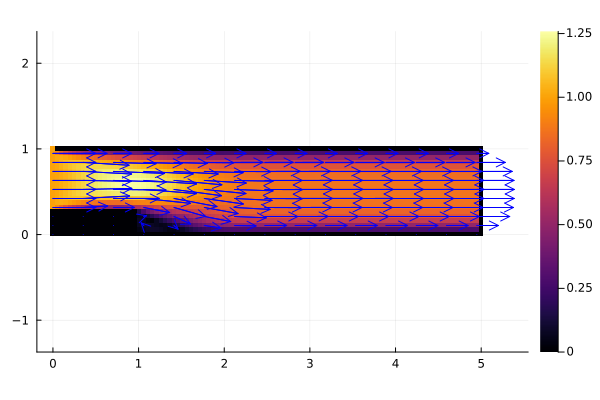

In [8]:
function plot_vector_field(x::Vector, y::Vector, u::Matrix, v::Matrix; stridex::Int=1, stridey::Int=1)
    if size(u) != size(v)
        error("u と v のサイズが一致しません")
    end

    nx, ny = size(u)  # グリッドサイズ
    if length(x) != nx || length(y) != ny
        error("x, y の長さと u, v のサイズが一致しません")
    end

    # ストライドごとにサンプリング
    x_sample = x[1:stridex:end]
    y_sample = y[1:stridey:end]
    u_sample = u[1:stridex:end, 1:stridey:end]
    v_sample = v[1:stridex:end, 1:stridey:end]

    # メッシュグリッドの作成
    X = repeat(x_sample, 1, length(y_sample))
    Y = repeat(y_sample', length(x_sample), 1)

    # quiverプロット
    quiver!(vec(X), vec(Y), quiver=(vec(u_sample), vec(v_sample)), aspect_ratio=:equal, linecolor=:blue, )
end

k = 0.5

plot_vector_field(param.x, param.y, k * field.u, k * field.v, stridex=7, stridey=2)

## 圧力

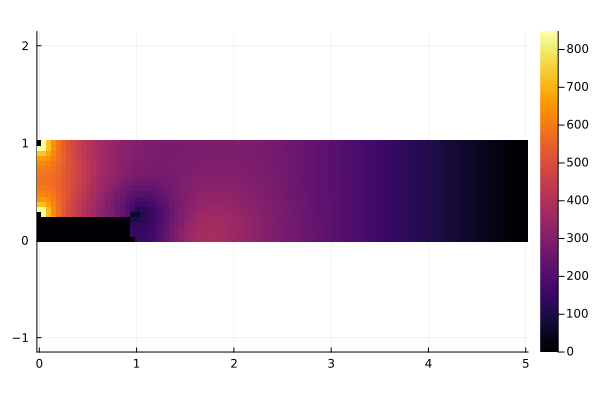

In [9]:
heatmap(param.x, param.y, field.p', aspect_ratio=:equal)